Anális Descriptivo

Script para verificar las correlaciones de las variables auxiliares con los indicadores, y sus componentes
(numerador y denominador)



In [3]:
%reset -f

import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

In [5]:
carpeta_actual = os.getcwd()
carpeta_datos = 'datos_intermedios'
ruta_archivo = os.path.join(carpeta_actual, carpeta_datos, '1_Base_para_modelos_ECSC2019.xlsx')
Base_mix_ECSC = pd.read_excel(ruta_archivo)

In [6]:
Base_mix_ECSC.head(1)

,DEPMUNI,FEX_C,num_escol_ex,num_des_rutas,den_des_rutas,num_acc_ase,den_acc_ase,num_nec_jur,den_nec_jur,num_efec_pac,...,safam_cprd,sas_tot,sas_cab,sas_cprd,trinf_tot,trinf_cab,trinf_cprd,triml_tot,triml_cab,triml_cprd
0,76001,1.741550e+06,1.443396e+06,13891.445924,167835.024146,31605.645754,409333.616672,47580.97187,150633.543813,35617.133179,...,7.1,17.7,17.8,16.5,0.6,0.5,0.7,75.3,75.1,80.6


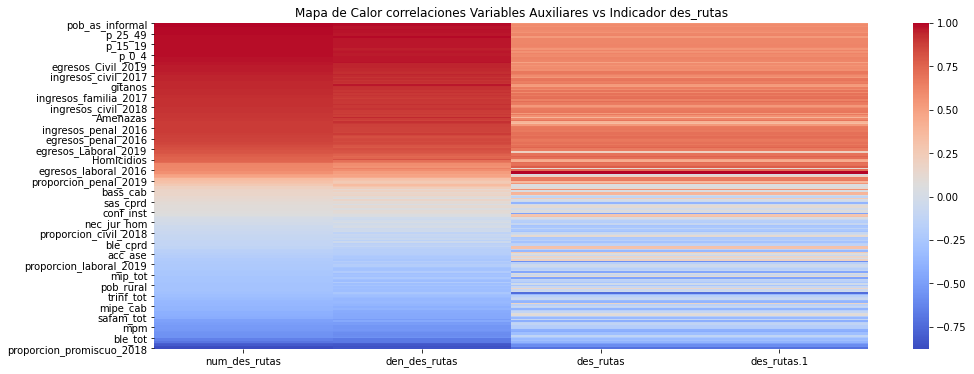

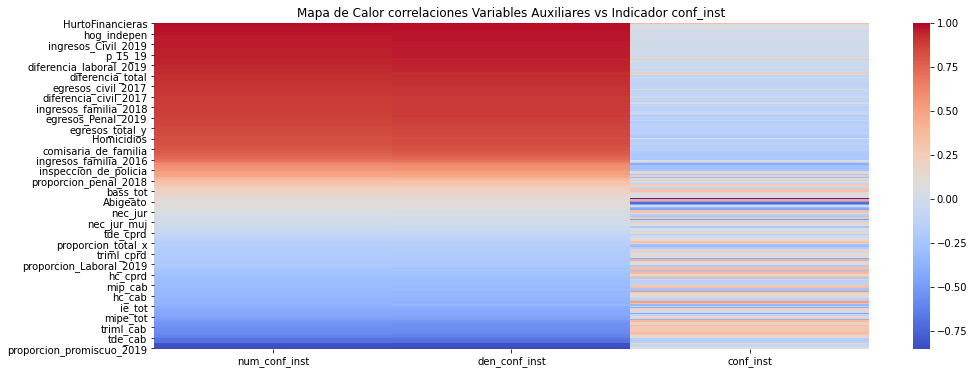

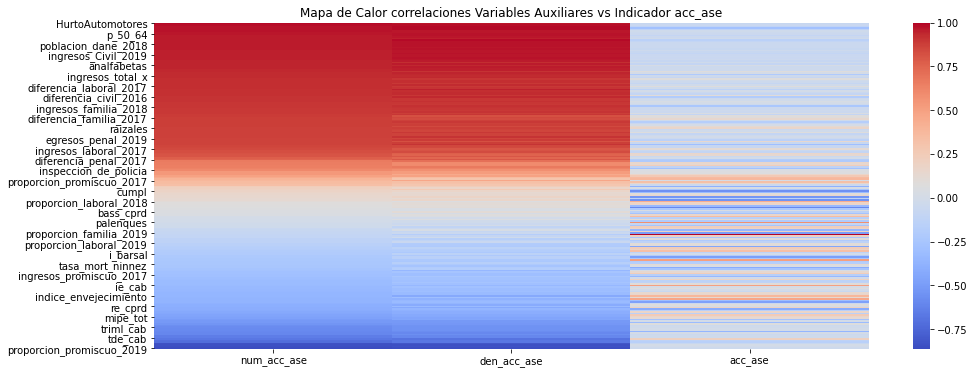

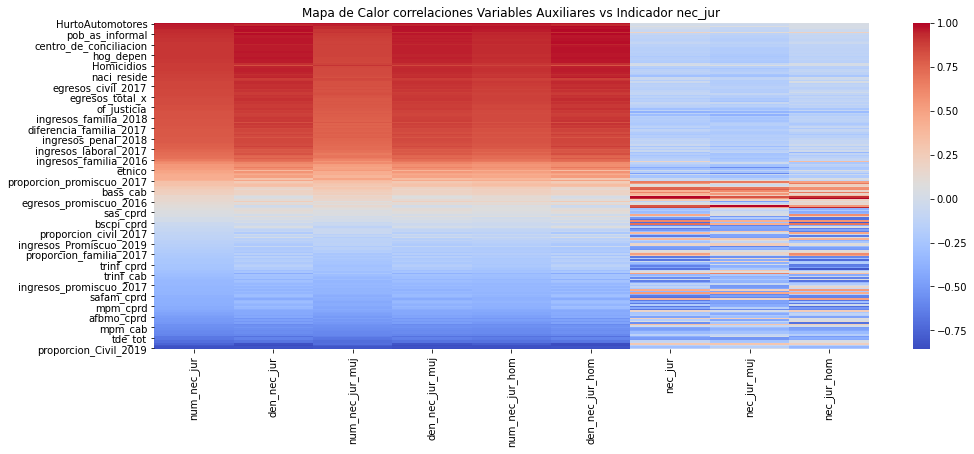

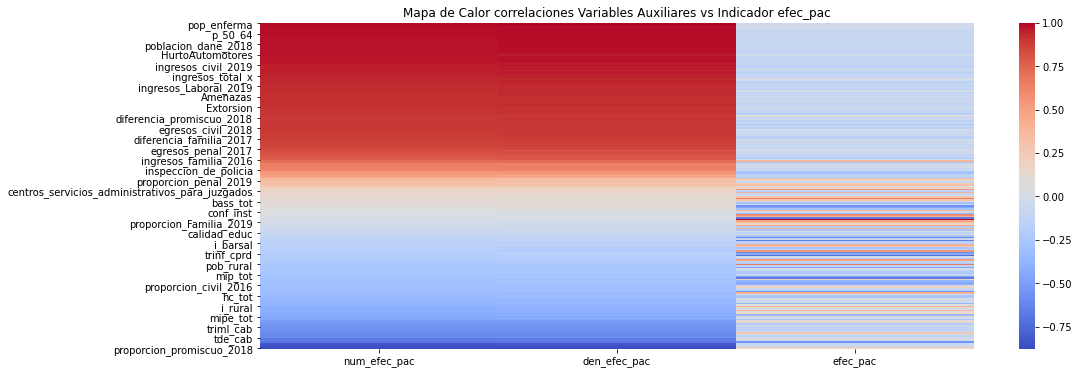

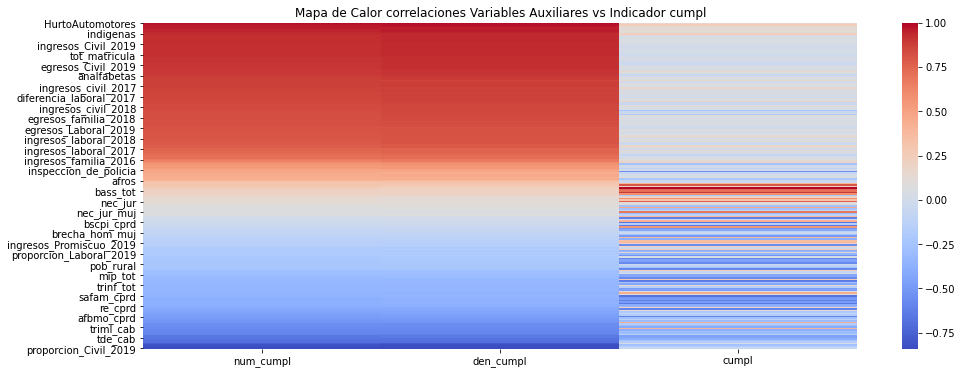

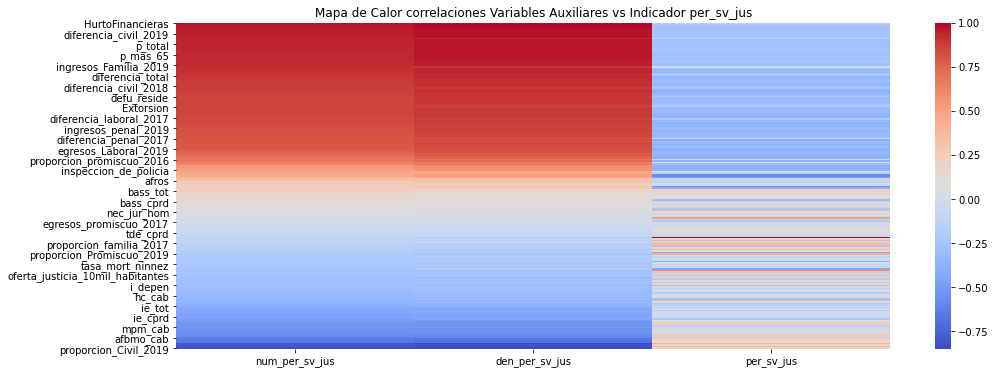

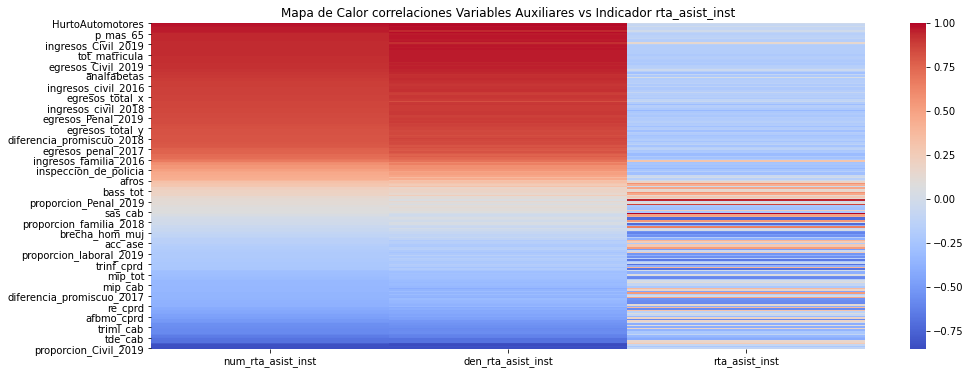

In [7]:
#Generamos los mapas de calor para los indicadores y sus componentes (numerador y denominador)
Ind=['des_rutas', 'conf_inst', 'acc_ase', 'nec_jur', 'efec_pac', 'cumpl', 'per_sv_jus', 'rta_asist_inst']
for i in Ind:
    Corr_tot=Base_mix_ECSC.corr()
    Corr=Corr_tot.filter(regex = i)
    Corr=Corr.iloc[23:,:].sort_values(by='num_'+i, ascending=False)
    #Gráfico de calor de las correlaciones
    plt.figure(figsize=(16,6))
    sns.heatmap(Corr, cmap="coolwarm" )
    plt.title("Mapa de Calor correlaciones Variables Auxiliares vs Indicador "+i);  

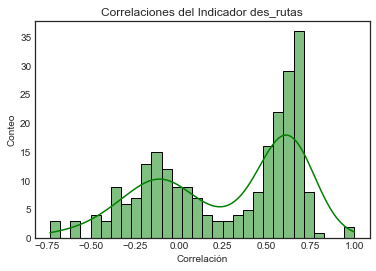

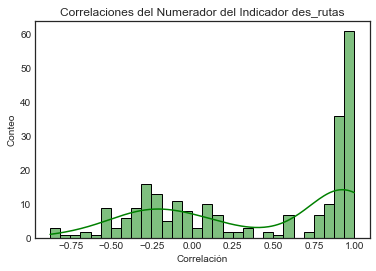

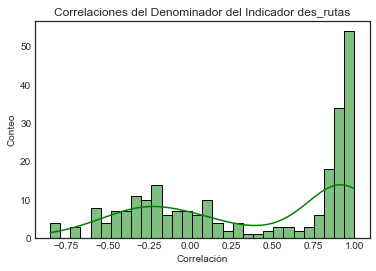

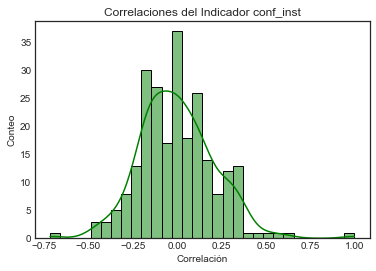

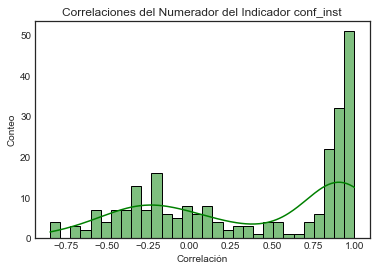

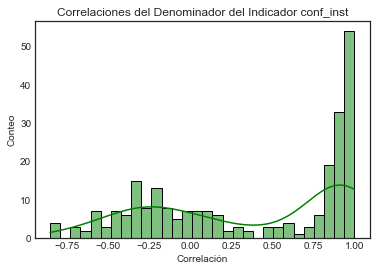

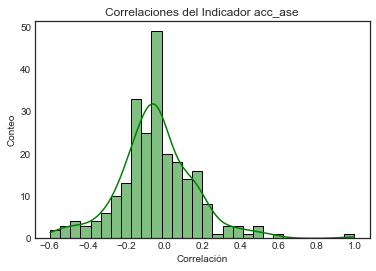

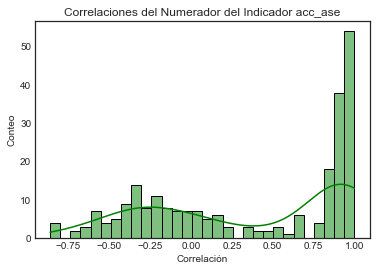

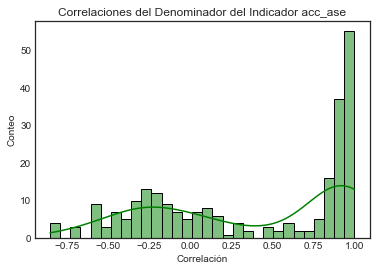

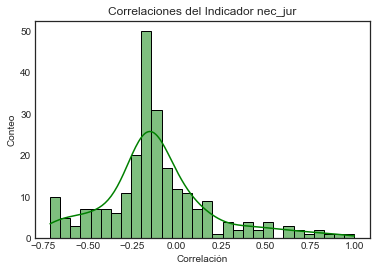

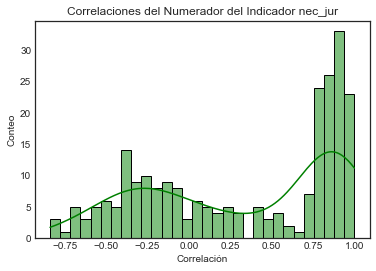

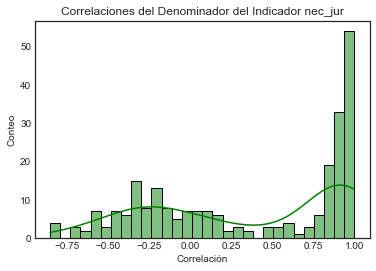

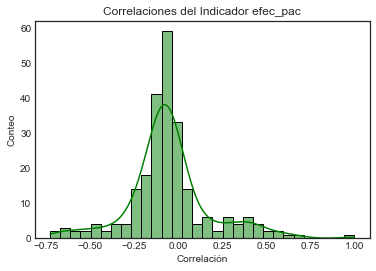

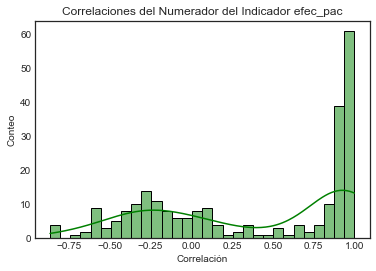

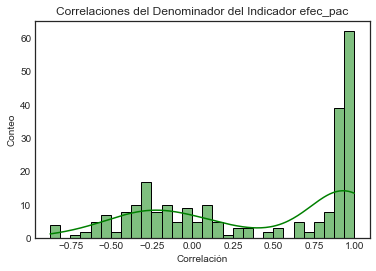

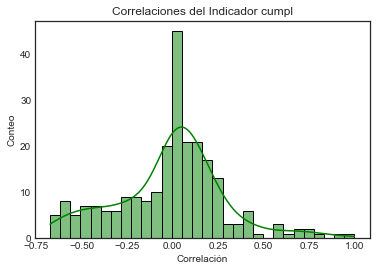

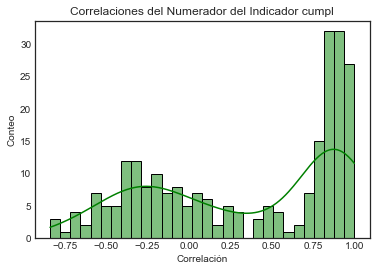

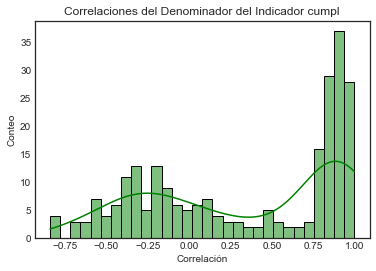

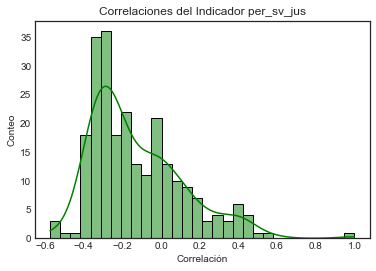

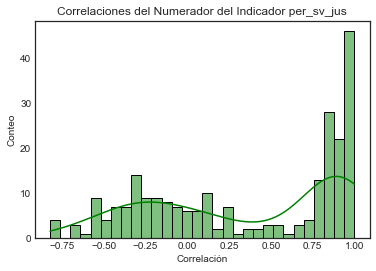

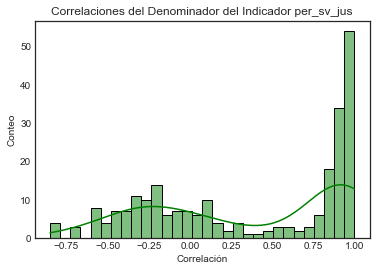

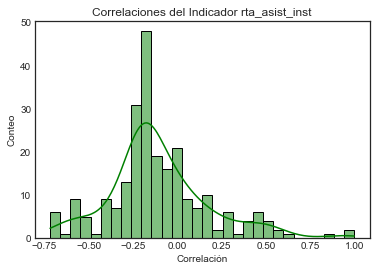

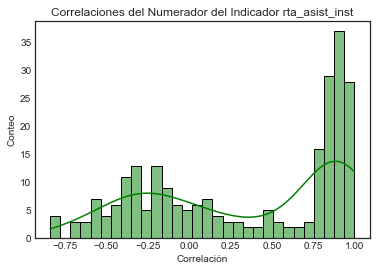

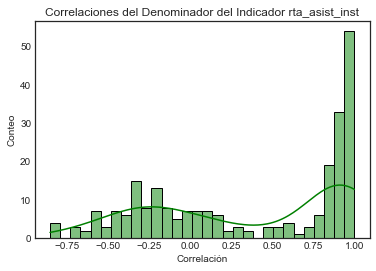

In [8]:
#Se realizan los histogramas de las correlaciones 
Ind=['des_rutas', 'conf_inst', 'acc_ase', 'nec_jur', 'efec_pac', 'cumpl', 'per_sv_jus', 'rta_asist_inst']
Corr_tot=Base_mix_ECSC.corr()
plt.style.use('seaborn-white')
for i in Ind:
    fig = sns.histplot(data=Corr_tot, x=i, bins=30, kde=True, color='Green')
    plt.title("Correlaciones del Indicador "+i)
    plt.xlabel('Correlación')
    plt.ylabel('Conteo')
    plt.show(fig);
    #Histograma de las correlaciones de las variables auxiliares vs los numeradores
    plt.style.use('seaborn-white')
    fig = sns.histplot(data=Corr_tot, x="num_"+i, bins=30, kde=True, color='Green')
    plt.title("Correlaciones del Numerador del Indicador "+i)
    plt.xlabel('Correlación')
    plt.ylabel('Conteo')
    plt.show(fig);
    #Histograma de las correlaciones de las variables auxiliares vs los denominadores
    plt.style.use('seaborn-white')
    fig = sns.histplot(data=Corr_tot, x="den_"+i, bins=30, kde=True, color='Green')
    plt.title("Correlaciones del Denominador del Indicador "+i)
    plt.xlabel('Correlación')
    plt.ylabel('Conteo')
    plt.show(fig);